# Dynosaur

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Welcome to Dynosaur, a machine learning project I started to learn all about
[reinforcement learning](https://en.wikipedia.org/wiki/Reinforcement_learning) and
beat the Google Dinosaur Jumper Game.
To get started, head on over to [http://dynosaur.billyz.me](http://dynosaur.billyz.me)

## Table of Contents
- [The Game](#The-Game)
- [Neural Networks](#Neural-Networks)
- [Multidimensional Optimization Problem](#Multidimensional-Optimization-Problem)
- [Neuroevolution](#Neuroevolution)
- [Neuroevolution of Augmenting Topologies](#Neuroevolution-of-Augmenting-Topologies)
  - [Sequential NEAT](#Sequential-NEAT)
  - [Parallel NEAT](#Parallel-NEAT)
  - [Continuous NEAT](#Continuous-NEAT)
- [Further Improvements](#Further-Improvements)
  - [Backpropagation](#Backpropagation)
  - [Q Learning](#Q-Learning)
    - [Sequential Q](#Sequential-Q)
    - [Parallel Q](#Parallel-Q)
  - [Cloud Dynosaur](#Cloud-Dynosaur)
- [The Lab](#The-Lab)

## The Game
The Google Dinosaur Game is found on Google Chrome's default offline page.
The game has a simple objective: maximize your score by avoiding oncoming obstacles. The longer you survive, the higher the score becomes.

![](googledinosaurgame.png "Google Dinosaur Game")

### Actions
The dinosaur has three actions: jump (up arrow or space), duck (down arrow), or neither.
When the dinosaur is ducking, its collision box becomes shorter than when it is standing up.
When the dinosaur jumps, its collision box maintains the same dimensions while rising upwards using standard projectile physics.

### Obstacles
There are two obstacles to avoid in the game: cacti and pterodactyls. Cacti have varying  height but are always located on the ground. They can be clustered or singular, which alters the width of their collision boxes. In order to continue, dinosaurs must jump over the cacti.
Pterodactyls are always singular and all have the same dimensions. However, pterodactyls can hover at three different heights. At the lowest height, the dinosaur must jump over the pterodactyls to continue. At the second lowest height, the dinosaur can jump over the pterodactyl or duck under in order to continue. At the highest height, the dinosaur can do all three actions (if timed correctly) in order to continue.

### Inputs
In order to make this game accessible to the bot, an open source version of the game, with identical physics, was utilized. The game file was modified to allow the bot to access data to use as inputs. These inputs are

- T-Rex Speed
- Distance from Ground to the Top of T-Rex Collision Box
- Distance from Ground to the Bottom of T-Rex Collision Box
- Distance from Left of the First Obstacle Collision Box to Right of the T-Rex Collision Box
- Distance from Right of the First Obstacle Collision Box to Right of the T-Rex Collision Box
- Distance from Ground to the Top of First Obstacle Collision Box
- Distance from Ground to the Bottom of First Obstacle Collision Box
- Distance from Left of the Second Obstacle Collision Box to Right of the T-Rex Collision Box
- Distance from Right of the Second Obstacle Collision Box to Right of the T-Rex Collision Box
- Distance from Ground to the Top of Second Obstacle Collision Box
- Distance from Ground to the Bottom of Second Obstacle Collision Box

![](inputsoutputs.png "Inputs and Outputs")

## Neural Networks

In order to give the dinosaur some way to make decisions on whether to jump or duck, each dinosaur will have a neural network “brain”. [Neural Networks](https://en.wikipedia.org/wiki/Artificial_neural_network) consist of artificial neurons that are linked together to model biological neurons.

### Neurons
An [artificial neuron](https://en.wikipedia.org/wiki/Artificial_neuron) applies activation function $\varphi(\nu)$ to Euclidean inner product of inputs and weights $\nu = \sum x_i \omega_i$ to produce output $y$, which is fed into the next neurons. In addition, the inner product may also be shifted by the bias of a node $b$. Thus $y=\varphi(\sum x_i \omega_i-b)$. Artificial neurons model [biological neurons](https://en.wikipedia.org/wiki/Neuron), which sum up all stimuli from dendrites and synapses across axon when above a certain threshold.


![](neuron.png "Artificial Neuron")

### Activation Functions
[Activation functions](https://en.wikipedia.org/wiki/Activation_function) are typically [Sigmoid functions](https://en.wikipedia.org/wiki/Sigmoid_function) to round out extreme inputs and center them around zero.

![](activation.png "Activation Functions")

### Networks
A network of neurons allows one to create an overall system, in which each neuron’s output feeds into another’s input. Networks consists of input, hidden, and output neurons.
Input neurons sense stimuli. Hidden neurons allow for internal abstraction of senses. Output neurons respond with interpretation of stimuli.

![](neuralnet.png "Neural Network")

The dinosaurs will take the numerical values of the inputs measured above, propagate them through the networks and use the output values to decide whether or not to jump or duck. Between the two output neurons the actions will be decided using the following pseudocode:

```
if(output2 > outputThreshold2):
  duck
else if(output1 > outputThreshold1):
  jump
else:
  idle
```

## Multidimensional Optimization Problem

A dinosaur will perform and score based off of what neural network it has. Thus, we can consider a dinosaur's score a function of it's neural network. But because a network is merely an $n$-dimensional vector $v_n$ of weights and biases, the score is actually a function of an $n$-dimensional vector $f(v_n)$. Thus the problem to find an optimal scoring dinosaur is actually a multidimensional [optimization problem](https://en.wikipedia.org/wiki/Optimization_problem) to find the $n$-dimensional vector (set of weights and biases) that yield the global maximum.

![](multidimensional.png "Multidimensional Graph")

## Neuroevolution
The first method used to mutate the networks is known as [neuroevolution](https://en.wikipedia.org/wiki/Neuroevolution). Neuroevolution serves as a [heuristic](https://en.wikipedia.org/wiki/Heuristic) for exploring the multidimensional search space utilizing [genetic operators](https://en.wikipedia.org/wiki/Genetic_operator) observed in [biological evolution](https://en.wikipedia.org/wiki/Evolution).

### Genome
At its very base, neuroevolution modifies the [genomes](https://en.wikipedia.org/wiki/Genome) of a population. After the genomes are altered, the genomes are expressed into neural networks. In this project, the genome of the neuroevolution population is just the neural network. The neural network contains weights and biases all between $-1$ and $1$

### Neural Network
In neuroevolution, the shape of the network is fixed--no edges or nodes will be added or removed. In this project, the shape of the neural network is that of a [feed-forward network](https://en.wikipedia.org/wiki/Feedforward_neural_network). However, the edges and nodes undergo weight and bias mutations, altering the values of the weights and biases used to calculate outputs.

### Fitness
After a dinosaur runs, it is assigned a [fitness score](https://en.wikipedia.org/wiki/Fitness_approximation) using a [fitness function](https://en.wikipedia.org/wiki/Fitness_function). For standard neuroevolution, the fitness score is determined by $\psi(s) = s^2$ where $s$ is the dinosaur's score. This allows the fitness scale quadratically with score, weighting differences in lower scores less than differences in higher scores.

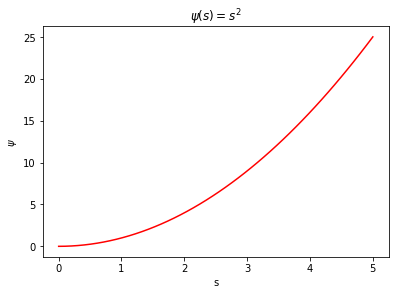

In [3]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

x = np.linspace(0, 5)
y = x ** 2
axes.plot(x, y, 'r')

axes.set_xlabel('s')
axes.set_ylabel(r'$\psi$')
axes.set_title(r'$\psi(s) = s^2$')
plt.show()

### Genetic Operators
After each dinosaur is assigned a fitness, the entire population undergoes an evolutionary cycle. During the cycle, the dinosaurs are evolved by the three main genetic operators

- [Selection](https://en.wikipedia.org/wiki/Selection_%28genetic_algorithm%29)
- [Crossover](https://en.wikipedia.org/wiki/Crossover_%28genetic_algorithm%29)
- [Mutation](https://en.wikipedia.org/wiki/Mutation_%28genetic_algorithm%29)

### Selection
Selection as a genetic operator is meant to organize the dinosaurs in some way so that they are crossed to encourage certain traits. For example, a random selection would arbitrarily select two dinosaurs to crossover, regardless of their fitness. Of course, this wouldn't be very useful, so a selection that works based on fitness scores was used. During this stage in the project, there weren't very many successful simulations, so a variety of selections were investigated, such as elitism (simply selecting the top $n$ dinosaurs by fitness). However, use of elitism was discouraged because it reduced the amount of exploration neuroevolution did, and quickly located local maxima (continuously jumping), but not the global one. Ultimately, a simple [fitness proportionate selection](https://en.wikipedia.org/wiki/Fitness_proportionate_selection) was utilized in order to weight the dinosaurs by their fitness and encourage higher fitness dinosaurs to reproduce with other higher fitness dinosaurs, without reducing the population's diversity too quickly. Roulette wheel selection (the method used) is a specific type of fitness proportionate selection. In it, each dinosaur is given the probability of being selected based on the percentage its fitness constituted the total fitness of the population.

![](fitnesspropsel.png "Fitness Proportionate Selection")

The pseudocode for Roulette Wheel Selection is as follows

```
Compute total fitness F
Generate random number R between 0 (inclusive) and F (not inclusive)
Compute cumulative fitness
Determine the index I of the cumulative fitness distribution which R is greater but less than the next index
Select I
```

### Crossover
After the dinosaurs are selected in some order, they are then crossed. Crossover in neuroevolution is quite simple; because each dinosaur has the exact same shape for their neural network as the others, corresponding nodes and edges would be switched depending on a set crossover rate

The pseudocode for crossing is as follows:

```
for all corresponding nodes and edges:
  if(random < crossoverRate):
    swap corresponding nodes/edges
```

Because the function of the game is not necessarily multiplicative in respect to the genomes, it does not necessarily follow that two high fitness dinosaurs will yield a higher or equally as high fitness dinosaur. Likewise for low scoring dinosaurs. There isn't necessarily a correlation between the performance of parent dinosaurs and the offspring.

### Mutation
In the neuroevolution portion of this project, only numerical adjustment mutations of the weights and biases were explored. Mutations occur at a random set rate. At first, the numerical adjustments shifted the weights and biases a fixed value in either direction, however it was noted that this mutated weights and biases too much, often quickly reaching the boundary of possible values. In order to solve this problem, a much more natural version of the numerical adjustment mutation was derived: the magnitude of adjustment was made by sampling a Gaussian Distribution $\mathcal{N}(0,1)$. Gaussian distribution are theorized to represent normal distributions, with high frequency towards more centered values and less chance of outer values being selected.

![](gaussian.jpg "Gaussian Distribution")

### Issues with Neuroevolution
An issue that is quickly realized is that neuroevolution, although favorable for having fixed, manageable neural network shapes, has an enormous search space. Assuming that each node and bias have values to the nearest hundredth, each numerical value in the neural network can then occupy $200$ possible values. Thus, for a neural network vector of length $n$, there are $200^n$ possible combinations of weights and biases that the neural network could occupy, which is exponential (and very, very bad).

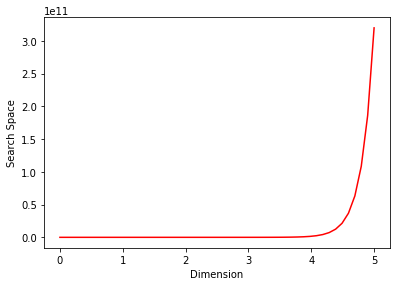

In [4]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

x = np.linspace(0, 5)
y = 200 ** x
axes.plot(x, y, 'r')

axes.set_xlabel('Dimension')
axes.set_ylabel('Search Space')
plt.show()

## Neuroevolution of Augmenting Topologies
The second method tried was based off a paper by Kenneth Stanley. [Neuroevolution of Augmenting Topologies (NEAT)](http://nn.cs.utexas.edu/downloads/papers/stanley.ec02.pdf) was a method commended for having much more success than the standard neuroevolution. Unlike in neuroevolution where the shape of the neural networks were fixed, the topologies of networks in NEAT are openly available to genetic modification. This is what makes it beneficial. Because each network starts initially as an empty network, and grows in degree from there, NEAT is able to explore the search space while minimizing dimensionality (see [above](#Issues-with-Neuroevolution))

### Sequential NEAT
Sequential NEAT borrows from the algorithms already created in Neuroevolution, however with one major difference: the code is now organized in an object-orientated manner. This makes it much easier to manage individuals within the population.

#### Genome
Because the topology of the networks are now alterable, the genome of the dinosaur can no longer be just the neural network. In order to appropriately manage neurons when crossing and mutating dinosaurs, JSON objects were used to nodes and edges. Node biases were simply indexed by their node number, while edges were indexed by their innovation number (will be explained later). Edges also contain a new attribute: whether or not they are enabled (also will be explained later). Then later, when the dinosaurs are simulated, a neural network is expressed from the genome.

![](neatgenome.png "NEAT Genome")

#### Recurrent Networks
Because the edges can now be from any node to any node (including itself), NEAT dinosaurs have access to networks known as [recurrent neural networks](https://en.wikipedia.org/wiki/Recurrent_neural_network). RNNs allow for more specified behavior, as networks now have access to its own values, creating a sense of short term memory.

#### Fitness
Now that there's an element of size of a network, the fitness function must be tweaked slightly. As mentioned before, the thing that makes NEAT more favorable than neuroevolution is its ability to work from the bottom up in respect to dimensionality. In order to encourage this, the fitness function will be modified to take into account the size of the graph. It is now given by $\psi(s,N) = \frac{s^2}{\sqrt{N}}$ where $s$ is the score and $N$ is the number of edges in the graph. This encourages smaller networks while the square root penalizes differences in smaller degree networks more than differences in larger degree networks.

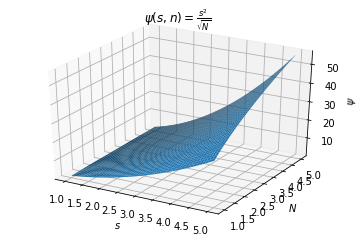

In [5]:
fig = plt.figure()
axes = fig.gca(projection='3d')

x = np.linspace(1, 5)
y = np.linspace(1, 5)
x, y = np.meshgrid(x, y)
z = x ** 2 / 1.0 * np.sqrt(y)

surf = axes.plot_surface(x, y, z)
axes.set_xlabel(r'$s$')
axes.set_ylabel(r'$N$')
axes.set_zlabel(r'$\psi$')
axes.set_title(r'$\psi(s,n) = \frac{s^2}{\sqrt{N}}$')

plt.show()

#### Crossover
Now that the genome is different, a new crossover algorithm must be devised. The one used in this project is the one proposed by Stanley in his paper. It follows this diagram:

![](neatcrossover.png "NEAT Crossover")

First, an issue that is run into is the naming conventions of edges. In order to solve this problem, a global edge labeling system is proposed by Stanley, known as innovation number. Whenever a novel edge is discovered (between a combination of nodes not recorded before), the total innovations is incremented and the newest edge is given the highest innovation number. These numbers will be used to easily compare the topology of one dinosaur to another. The proposed crossover algorithm lines up the two parents' genomes so they match in innovation number and are in the respective order. This process is known as [synapsis](https://en.wikipedia.org/wiki/Synapsis), an event that occurs in biological crossover as well, when comparing homologous chromosomes. After the genes are lined up, the offspring inherits genes from the parents according to the following pseudocode

```
Without Loss of Generality, Assume Parent 1 has higher or equal fitness to Parent 2
If both parents have Gene x (mutual gene): 
  Inherit Gene x from a parent randomly (according to crossover rate)
If only one parent has Gene x (excess at the end, disjoint otherwise):
  If Parents have equal fitness:
    Inherit the gene/lack of gene from a parent randomly (according to crossover rate)
  else:
    Inherit the gene/lack of gene from Parent 1 
```

#### Mutation
Now that there are variable shape networks, there are new structural mutations, as well as disabling/enabling mutations. Each mutation's probability of occurring can be adjusted in the configuration files. The new mutations are as follows

- Add Edge Mutation
    - This mutation randomly finds a nonexistant edge in the network and constructs it. In order to keep track of all the nonedges in the network, [Cantor's Pairing Function](https://en.wikipedia.org/wiki/Pairing_function) was utilized to hash each nonedge by its possible source and destination nodes (as they didn't have innovation numbers to keep track of them).
![alt text](neataddedge.png "NEAT Add Edge Mutation")
- Delete Edge Mutation
    - This mutation randomly selects an edge to delete
- Add Node Mutation
    - This mutation randomly selects an edge to split into two edges with a node between. The full edge, while still preserved in the genome, is disabled and thus not expressed. While there is no delete node mutation, node growth is managed by the automatic deletion of nodes when they are in contact with no edges.
![alt text](neataddnode.png "NEAT Add Node Mutation")

- Disable Mutation
    - A new feature that NEAT brings is the ability to disable edges. Once an edge is disabled, it is kept in the genome and is still capable of being passed down to offspring, but is not expressed in the phenotype until reenabled.
- Enable Mutation
    - Enables an edge

#### Issues with Sequential NEAT
Unfortunately, the reduction of dimensionality was still not enough to get reasonable results. While better, running NEAT sequentially still requires a lot of time to simulate each dinosaur individually.

### Parallel NEAT
This is where the object-oriented data comes in handy. From sequential NEAT to parallel neat, nothing is really different. The only real difference is there are no longer any UI elements because all of the processing power is used to simulate as many dinosaurs at the same time as possible. All the dinosaurs begin at the same time, and they run until they lose, at which point they wait for all of the other dinosaurs to fail. After all the dinosaurs have failed, the genetic operations are carried out and the cycle is repeated. This is good because now the runtime of the program is independent of the size of the population, meaning that much more dinosaurs can be simulated in a much shorter time.

#### Results
Because of it's parallel set-up, parallel NEAT was able to produce over-1000 scoring dinosaurs after 3-4 hours on average.

#### Issues with Parallel NEAT
The most obvious issue with parallel NEAT is that a lot of runtime is wasted waiting for the highest-scoring dinosaurs to finish.

### Continuous NEAT
Now this is where things get good. In order to remedy the problem with parallel NEAT, I designed a variation of parallel NEAT where a new offspring automatically populates the game of a dinosaur that failed. Now there is no time wasted waiting for other dinosaurs to finish.

#### Initial Issues with Continuous NEAT
Under the assumption that when a dinosaur failed, all the other dinosaurs were still running, we run into a major problem: the selection algorithm used to pick dinosaurs to crossover no longer works because it depends on fitnesses and thus scores of the other dinosaurs. However, because all the other dinosaurs had begun at different times, it was impossible to tell which dinosaurs actually had a bad score and which had just started and so on.

#### Rank
The solution to the aforementioned problem that I came up with was to establish a rank [priority queue](https://en.wikipedia.org/wiki/Priority_queue). This FIFO queue would keep track of the dinosaurs in respect to how long they lived. When a dinosaur began running, it would push itself into the queue and when it stopped running, it would delete itself from the queue. In order to find the longest living dinosaur, some method of traversal from the head of the queue towards the tail. So preferably the queue operations would look something like this

| Queue Operation| Time Complexity|
|:--------------:|---------------:|
| Push           | $O(1)$         |
| Delete         | $O(1)$         |
| Traverse       | $O(n)$         |

In order to accomplish this (and because javascript doesn't allow for addressing), I used three arrays to create a pseudo-pointer system. Two of the arrays were used to maintain a doubly-linked list, while one array was used to keep track of the address in the array of each dinosaur.

When a dinosaur fails, the pointer will begin at the head of the priority queue, and will traverse back and select a dinosaur according to a geometric distribution of probability. Thus, longer living dinosaurs are more likely to be selected, however shorter living ones are still allowed to reproduce.

#### Other Benefits of Continuous NEAT
Because continuous NEAT allows each simulation to progress independently of the others, this allows for a variety of evolutionary times. This works to our favor because, the shorter a dinosaur lasts, the more evolutionary cycles it will undergo in a set amount of time. Likewise, the longer a dinosaur lives, the less amount of evolutionary cycles it will undergo. This works almost like a dynamically adjusting learning rate, which is nice.

#### Results
Continuous NEAT has a high score of 7900 and usually reaches an average score of 1000-2000 within an hour. 

## Further Improvements
Here are some things I plan on working on

### Backpropagation
Backpropagation is a version of Dynosaur that is supervised, unlike the rest of Dynosaur. It utilizes [Long Short Term Memory Architecture](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) to learn how to respond to inputs using the user/players actions as labeled data

### Q Learning
#### Sequential Q
Sequential Q is an attempt to utilize [neural network approximated Q-learning](http://outlace.com/rlpart3.html) to learn how to play the game. Currently, I am using the [Euclidean Distance](https://en.wikipedia.org/wiki/Euclidean_distance) from the dinosaur to the first obstacle as a measure of reward. This seems like it should work intuitively because we would want the dinosaur to be incentivized to stay away from the obstacle ahead. The network used to decide whether or not to act is a perceptron, but currently, the dinosaur's movement is very finnicky
#### Parallel Q
Parallel Q is just Sequential Q's that all train a single neural network.


### Cloud Dynosaur
Cloud Dynosaur is a version of dynosaur that is primarily cloud-based. A backend server maintains a global population of dinosaurs. Meanwhile, users can come to the site and volunteer their hardware to train a sample of the existing dinosaurs and/or train new dinosaurs. After the dinosaurs are trained, they will be reuploaded back to the cloud.

## The Lab
Just as a side note, Parallel NEAT, Continuous NEAT, Sequential Q, and Parallel Q all don't have user interfaces (for the aforementioned reasons). Here's how to use them if you're curious. Just open up the console and type the following commands.

### Parallel NEAT
```javascript
//n is how many dinosaurs you want to evolve. Be careful!
neat.init(n);
//Press Spacebar and Immediately Click Away
neat.startEvolution();
```

### Continuous NEAT
```javascript
//n is how many dinosaurs you want to evolve. Be careful!
neat.init(n);
neat.startEvolution();
//Press Spacebar on Screen
```

### Sequential Q
```javascript
//Press Spacebar on Screen
```

### Parallel Q
```javascript
//n is how many dinosaurs you want to evolve. Be careful!
init(n);
//Press Spacebar on Screen
```